## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('data/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# EDA

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
df.shape

(396030, 27)

In [9]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [11]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Checking for missing data

<Axes: >

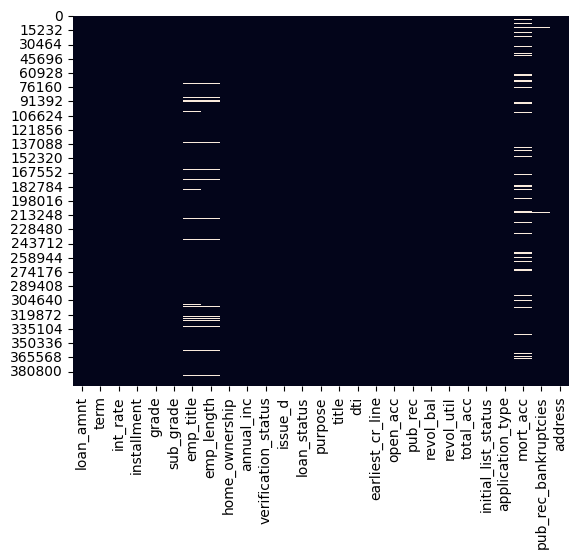

In [15]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)  # Visualize missing values


In [16]:
print(df.isnull().sum().sort_values(ascending=False))


mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64


In [17]:
# Droping off few features with high missing values
df.drop(['mort_acc', 'emp_title', 'emp_length', 'title'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [20]:
# Check target variable (loan_status)
print("Target variable distribution:")
print(df['loan_status'].value_counts())
print("\nTarget variable proportions:")
print(df['loan_status'].value_counts(normalize=True))

Target variable distribution:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Target variable proportions:
loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64


In [21]:
# Check remaining missing values
print("Missing values after dropping columns:")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Handle remaining missing values
# For numerical columns, fill with median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values after dropping columns:
pub_rec_bankruptcies    535
revol_util              276
dtype: int64


/tmp/ipykernel_5344/2977601269.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_5344/2977601269.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Missing values after imputation:
0


In [22]:
# Explore key features
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Create binary target variable (1 for Charged Off, 0 for Fully Paid)
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
print(f"\nTarget variable created: loan_repaid")
print(df['loan_repaid'].value_counts())

Dataset shape: (396030, 23)

Column names:
['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'address']

Target variable created: loan_repaid
loan_repaid
1    318357
0     77673
Name: count, dtype: int64


Correlation with target variable (loan_repaid):
loan_repaid             1.000000
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009416
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082343
Name: loan_repaid, dtype: float64


<Figure size 1200x800 with 0 Axes>

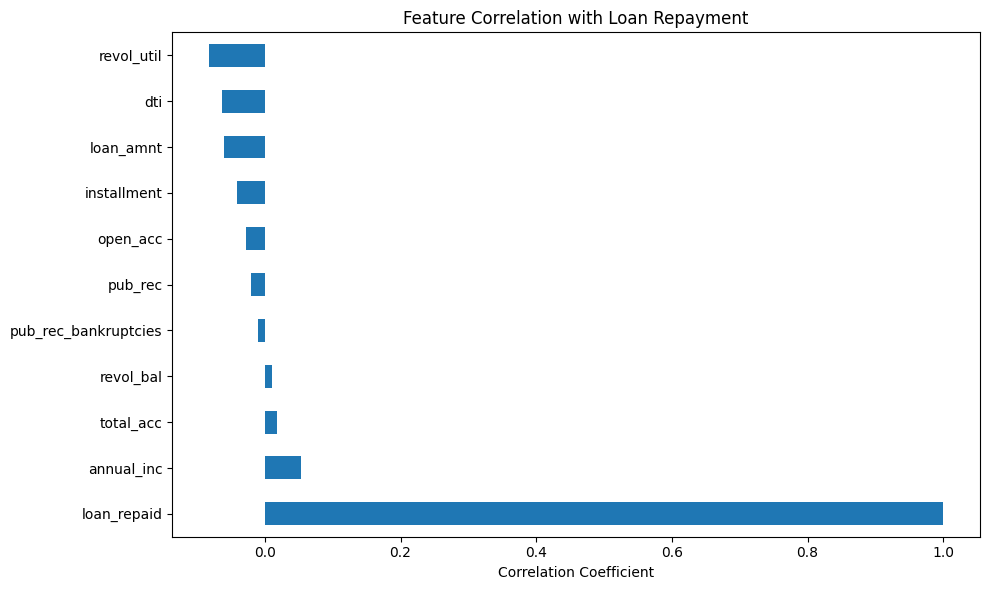

In [23]:
# Analyze numerical features correlation with target
plt.figure(figsize=(12, 8))
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('loan_repaid')  # Remove target from features

# Calculate correlation with target
correlation_with_target = df[numerical_features + ['loan_repaid']].corr()['loan_repaid'].sort_values(ascending=False)
print("Correlation with target variable (loan_repaid):")
print(correlation_with_target[:-1])  # Exclude self-correlation

plt.figure(figsize=(10, 6))
correlation_with_target[:-1].plot(kind='barh')
plt.title('Feature Correlation with Loan Repayment')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

Categorical features: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']

term - Unique values: 2
term
36 months    302005
60 months     94025
Name: count, dtype: int64

grade - Unique values: 7
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

sub_grade - Unique values: 35

home_ownership - Unique values: 6
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

verification_status - Unique values: 3
verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

issue_d - Unique values: 115

purpose - Unique values: 14
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
majo

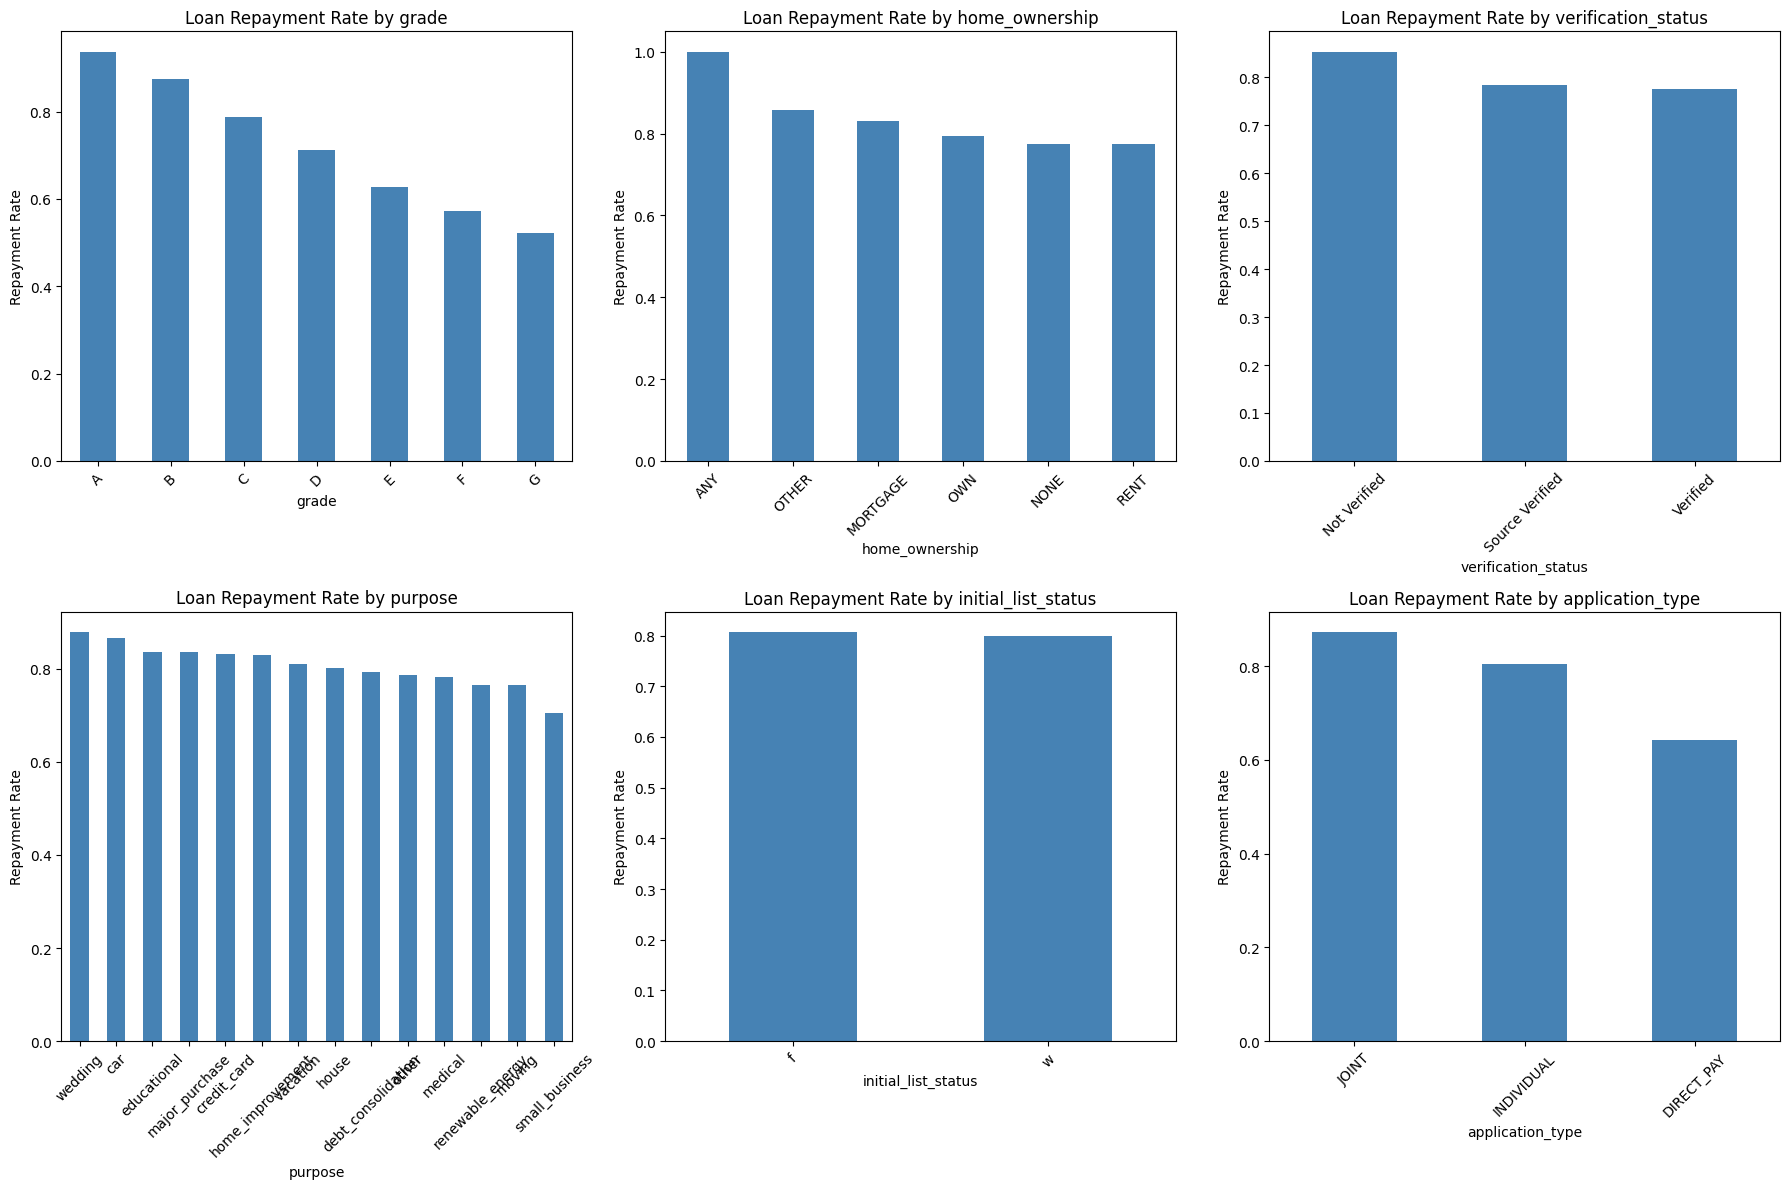

In [24]:
# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('loan_status')  # Remove original target
print("Categorical features:", categorical_features)

# Check unique values in categorical features
for col in categorical_features:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    if df[col].nunique() < 20:  # Only show if not too many categories
        print(df[col].value_counts())

# Analyze relationship between categorical features and target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

categorical_to_plot = ['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

for i, col in enumerate(categorical_to_plot):
    if col in df.columns:
        # Calculate default rate by category
        default_rate = df.groupby(col)['loan_repaid'].mean().sort_values(ascending=False)
        default_rate.plot(kind='bar', ax=axes[i], color='steelblue')
        axes[i].set_title(f'Loan Repayment Rate by {col}')
        axes[i].set_ylabel('Repayment Rate')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
# Feature Engineering
from datetime import datetime

# 1. Process date features
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# Create new date-based features
df['credit_history_length'] = (df['issue_d'] - df['earliest_cr_line']).dt.days / 365.25  # in years
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

# 2. Create derived features
df['debt_to_credit_ratio'] = df['revol_bal'] / (df['revol_bal'] + df['annual_inc'] + 1)  # +1 to avoid division by zero
df['credit_utilization_ratio'] = df['revol_util'] / 100  # Convert percentage to ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / (df['annual_inc'] + 1)

# 3. Create grade numeric mapping
grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df['grade_numeric'] = df['grade'].map(grade_mapping)

# 4. Create interaction features
df['installment_to_income'] = df['installment'] / (df['annual_inc'] / 12 + 1)  # Monthly installment to monthly income
df['total_credit_lines'] = df['open_acc'] + df['total_acc']

print("New features created:")
new_features = ['credit_history_length', 'issue_year', 'issue_month', 'debt_to_credit_ratio', 
                'credit_utilization_ratio', 'loan_to_income_ratio', 'grade_numeric', 
                'installment_to_income', 'total_credit_lines']
print(new_features)

# Check for any infinite or NaN values in new features
for feature in new_features:
    inf_count = np.isinf(df[feature]).sum()
    nan_count = df[feature].isnull().sum()
    print(f"{feature}: {inf_count} infinite values, {nan_count} NaN values")

/tmp/ipykernel_5344/3018535517.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])
/tmp/ipykernel_5344/3018535517.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


New features created:
['credit_history_length', 'issue_year', 'issue_month', 'debt_to_credit_ratio', 'credit_utilization_ratio', 'loan_to_income_ratio', 'grade_numeric', 'installment_to_income', 'total_credit_lines']
credit_history_length: 0 infinite values, 0 NaN values
issue_year: 0 infinite values, 0 NaN values
issue_month: 0 infinite values, 0 NaN values
debt_to_credit_ratio: 0 infinite values, 0 NaN values
credit_utilization_ratio: 0 infinite values, 0 NaN values
loan_to_income_ratio: 0 infinite values, 0 NaN values
grade_numeric: 0 infinite values, 0 NaN values
installment_to_income: 0 infinite values, 0 NaN values
total_credit_lines: 0 infinite values, 0 NaN values


In [26]:
# Feature Selection for ANN
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Create a copy for feature selection
df_model = df.copy()

# Encode categorical variables
categorical_cols_to_encode = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 
                             'purpose', 'initial_list_status', 'application_type']

label_encoders = {}
for col in categorical_cols_to_encode:
    if col in df_model.columns:
        le = LabelEncoder()
        df_model[col + '_encoded'] = le.fit_transform(df_model[col])
        label_encoders[col] = le

# Drop unnecessary columns for modeling
columns_to_drop = ['loan_status', 'issue_d', 'earliest_cr_line', 'address', 'sub_grade', 'term'] + categorical_cols_to_encode
df_model = df_model.drop(columns=[col for col in columns_to_drop if col in df_model.columns])

print("Columns after preprocessing:")
print(df_model.columns.tolist())
print(f"\nDataset shape: {df_model.shape}")

# Identify feature columns (excluding target)
feature_cols = [col for col in df_model.columns if col != 'loan_repaid']
X = df_model[feature_cols]
y = df_model['loan_repaid']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Columns after preprocessing:
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'credit_history_length', 'issue_year', 'issue_month', 'debt_to_credit_ratio', 'credit_utilization_ratio', 'loan_to_income_ratio', 'grade_numeric', 'installment_to_income', 'total_credit_lines', 'grade_encoded', 'sub_grade_encoded', 'home_ownership_encoded', 'verification_status_encoded', 'purpose_encoded', 'initial_list_status_encoded', 'application_type_encoded']

Dataset shape: (396030, 28)

Feature matrix shape: (396030, 27)
Target vector shape: (396030,)


Top 20 Most Important Features:
                     feature  importance
4                        dti    0.067424
16      loan_to_income_ratio    0.061058
11     credit_history_length    0.060669
18     installment_to_income    0.059971
14      debt_to_credit_ratio    0.058215
7                  revol_bal    0.056690
2                installment    0.053859
8                 revol_util    0.052949
1                   int_rate    0.052629
15  credit_utilization_ratio    0.052592
3                 annual_inc    0.050499
19        total_credit_lines    0.045322
21         sub_grade_encoded    0.044883
9                  total_acc    0.043969
0                  loan_amnt    0.042557
5                   open_acc    0.038958
13               issue_month    0.034673
12                issue_year    0.023504
24           purpose_encoded    0.019661
20             grade_encoded    0.018264


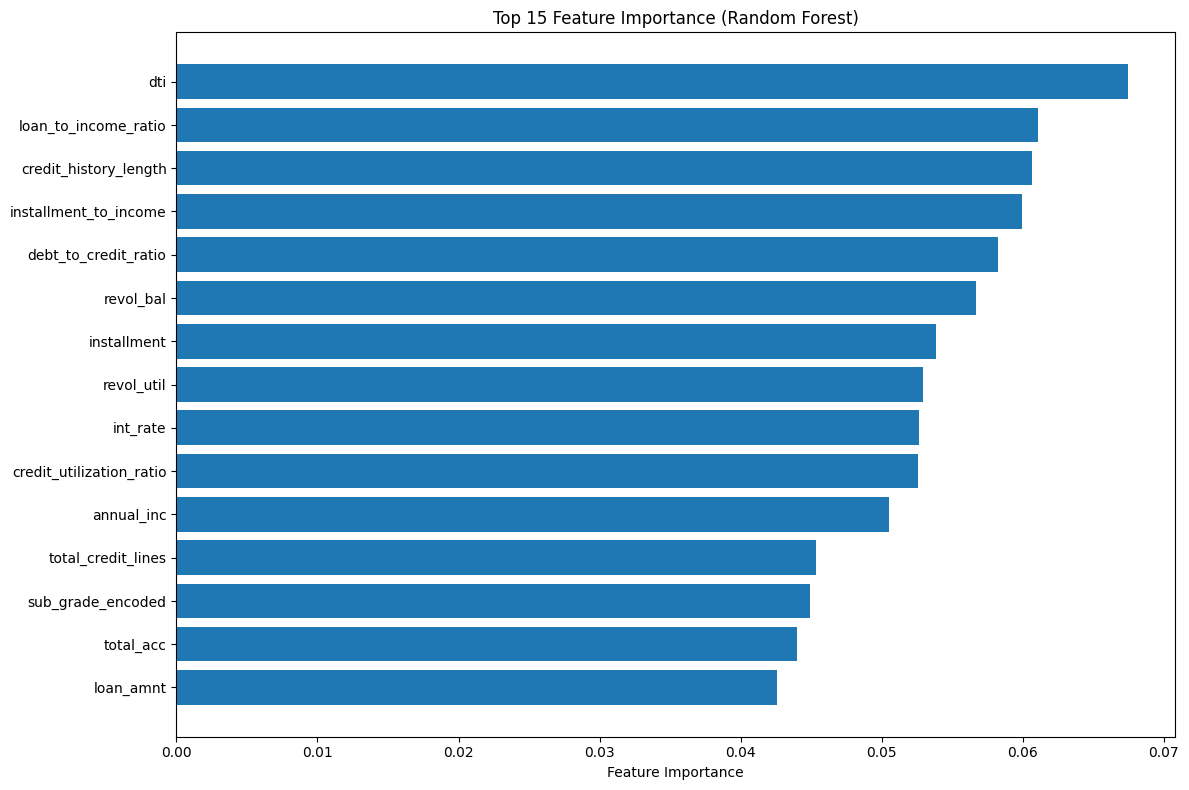

In [27]:
# Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data for feature importance calculation
X_temp, _, y_temp, _ = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

# Use Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_temp, y_temp)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Selected features for ANN:
 1. dti
 2. loan_to_income_ratio
 3. credit_history_length
 4. installment_to_income
 5. debt_to_credit_ratio
 6. revol_bal
 7. installment
 8. revol_util
 9. int_rate
10. credit_utilization_ratio
11. annual_inc
12. total_credit_lines
13. sub_grade_encoded
14. total_acc
15. loan_amnt

Final dataset shape: (396030, 15)
Target shape: (396030,)


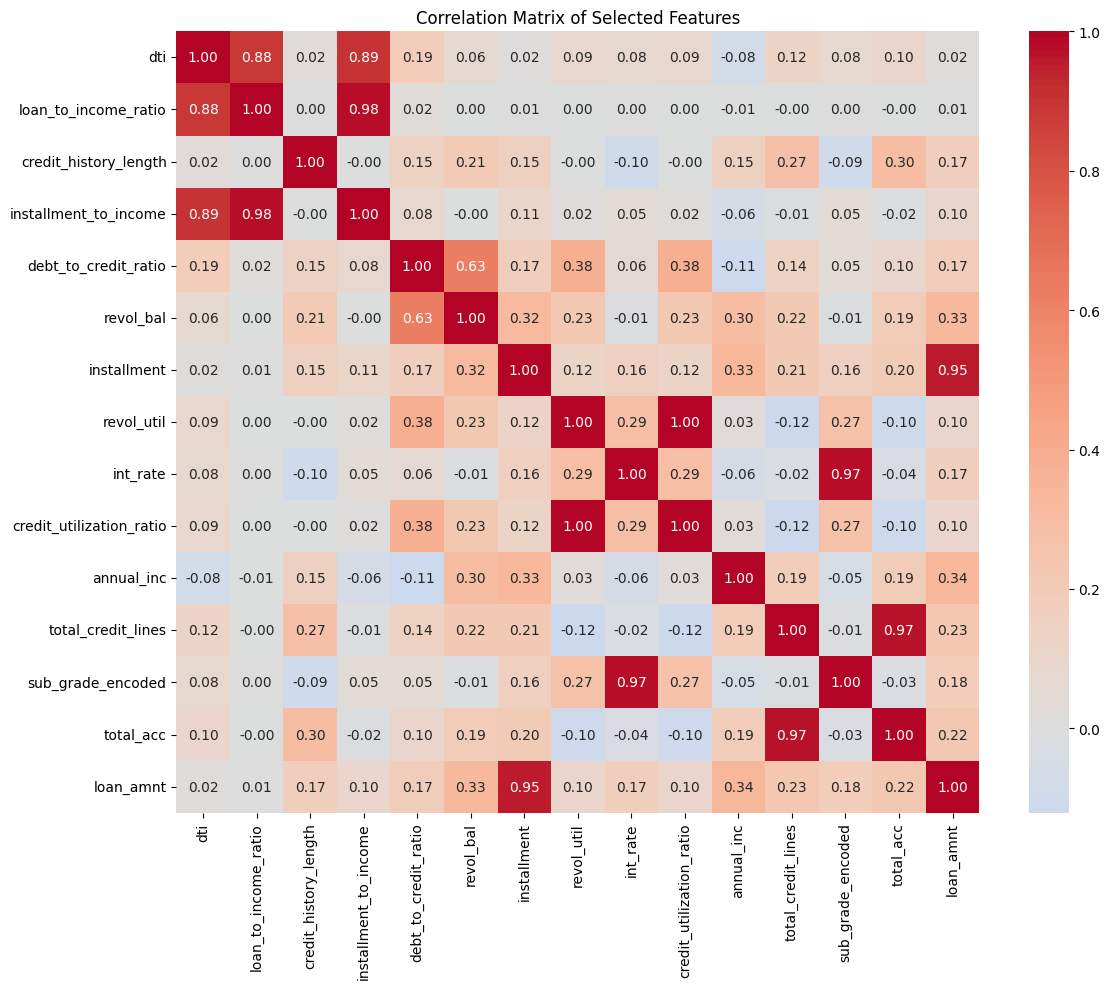


Highly correlated feature pairs (>0.8):
dti - loan_to_income_ratio: 0.884
dti - installment_to_income: 0.895
loan_to_income_ratio - installment_to_income: 0.977
installment - loan_amnt: 0.954
revol_util - credit_utilization_ratio: 1.000
int_rate - sub_grade_encoded: 0.974
total_credit_lines - total_acc: 0.971


In [28]:
# Select top important features for ANN
top_n_features = 15  # Select top 15 features based on importance

selected_features = feature_importance.head(top_n_features)['feature'].tolist()
print("Selected features for ANN:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Create final dataset with selected features
X_selected = X[selected_features]
y_selected = y

print(f"\nFinal dataset shape: {X_selected.shape}")
print(f"Target shape: {y_selected.shape}")

# Check correlation between selected features
plt.figure(figsize=(12, 10))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

# Check for highly correlated features (>0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("\nHighly correlated feature pairs (>0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("\nNo highly correlated feature pairs found.")

In [29]:
# Remove highly correlated features to avoid multicollinearity
# Keep the more interpretable or important feature from each pair

features_to_remove = [
    'loan_to_income_ratio',  # Keep dti instead (more standard metric)
    'installment_to_income',  # Keep dti instead  
    'credit_utilization_ratio',  # Keep revol_util instead (original feature)
    'sub_grade_encoded',  # Keep int_rate instead (more direct measure)
    'total_acc',  # Keep total_credit_lines instead (engineered feature)
    'loan_amnt'  # Keep installment instead (monthly impact more relevant)
]

# Final feature selection
final_features = [f for f in selected_features if f not in features_to_remove]
print("Final features for ANN after removing highly correlated ones:")
for i, feature in enumerate(final_features, 1):
    print(f"{i:2d}. {feature}")

# Create final dataset
X_final = X_selected[final_features]
y_final = y_selected

print(f"\nFinal dataset shape: {X_final.shape}")
print(f"Number of features: {len(final_features)}")

# Final correlation check
final_corr = X_final.corr()
max_corr = final_corr.abs().where(np.triu(np.ones(final_corr.shape), k=1).astype(bool)).max().max()
print(f"Maximum correlation between final features: {max_corr:.3f}")

# Display final feature statistics
print("\nFinal Feature Statistics:")
print("="*50)
final_stats = X_final.describe()
print(final_stats)

Final features for ANN after removing highly correlated ones:
 1. dti
 2. credit_history_length
 3. debt_to_credit_ratio
 4. revol_bal
 5. installment
 6. revol_util
 7. int_rate
 8. annual_inc
 9. total_credit_lines

Final dataset shape: (396030, 9)
Number of features: 9
Maximum correlation between final features: 0.629

Final Feature Statistics:
                 dti  credit_history_length  debt_to_credit_ratio  \
count  396030.000000          396030.000000         396030.000000   
mean       17.379514              15.754323              0.168875   
std        18.019092               7.201072              0.103431   
min         0.000000               2.997947              0.000000   
25%        11.280000              10.915811              0.091711   
50%        16.910000              14.335387              0.155176   
75%        22.980000              19.334702              0.230435   
max      9999.000000              70.162902              0.999906   

          revol_bal    insta

In [30]:
# Prepare data for ANN training
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final
)

print("Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]}")

# Scale the features for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaling completed using StandardScaler")
print("Features are now normalized with mean=0 and std=1")

# Check class distribution
print("\nClass distribution:")
print("Training set:")
print(f"  Fully Paid (1): {(y_train == 1).sum():,} ({(y_train == 1).mean():.1%})")
print(f"  Charged Off (0): {(y_train == 0).sum():,} ({(y_train == 0).mean():.1%})")
print("Test set:")
print(f"  Fully Paid (1): {(y_test == 1).sum():,} ({(y_test == 1).mean():.1%})")
print(f"  Charged Off (0): {(y_test == 0).sum():,} ({(y_test == 0).mean():.1%})")

# Save the feature names for future reference
print("\nFinal features for ANN:")
print(final_features)

Data split completed:
Training set: 316824 samples
Test set: 79206 samples
Feature dimensions: 9

Data scaling completed using StandardScaler
Features are now normalized with mean=0 and std=1

Class distribution:
Training set:
  Fully Paid (1): 254,686 (80.4%)
  Charged Off (0): 62,138 (19.6%)
Test set:
  Fully Paid (1): 63,671 (80.4%)
  Charged Off (0): 15,535 (19.6%)

Final features for ANN:
['dti', 'credit_history_length', 'debt_to_credit_ratio', 'revol_bal', 'installment', 'revol_util', 'int_rate', 'annual_inc', 'total_credit_lines']


In [33]:
# Save the processed dataset for ANN training
import os
import json

# Create processed data directory if it doesn't exist
processed_data_dir = 'data/processed'
os.makedirs(processed_data_dir, exist_ok=True)

# Convert scaled data back to DataFrames for saving
X_train_df = pd.DataFrame(X_train_scaled, columns=final_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=final_features)

# Add target variable to the datasets
train_data = X_train_df.copy()
train_data['loan_repaid'] = y_train.reset_index(drop=True)

test_data = X_test_df.copy()
test_data['loan_repaid'] = y_test.reset_index(drop=True)

# Save scaled datasets (ready for ANN training)
train_data.to_csv(f'{processed_data_dir}/train_data_scaled.csv', index=False)
test_data.to_csv(f'{processed_data_dir}/test_data_scaled.csv', index=False)

# Also save unscaled datasets (for analysis/interpretation)
X_train_original = X_train.copy()
X_train_original['loan_repaid'] = y_train.reset_index(drop=True)

X_test_original = X_test.copy()
X_test_original['loan_repaid'] = y_test.reset_index(drop=True)

X_train_original.to_csv(f'{processed_data_dir}/train_data_original.csv', index=False)
X_test_original.to_csv(f'{processed_data_dir}/test_data_original.csv', index=False)

# Save feature information
feature_info = pd.DataFrame({
    'feature_name': final_features,
    'feature_type': ['numerical'] * len(final_features),
    'description': [
        'Debt-to-income ratio (%)',
        'Credit history length (years)',
        'Debt to available credit ratio',
        'Total revolving credit balance ($)',
        'Monthly loan installment ($)',
        'Revolving credit utilization (%)',
        'Loan interest rate (%)',
        'Annual income ($)',
        'Total number of credit lines'
    ]
})

feature_info.to_csv(f'{processed_data_dir}/feature_info.csv', index=False)

# Save scaler parameters for future use
scaler_params = pd.DataFrame({
    'feature': final_features,
    'mean': scaler.mean_,
    'scale': scaler.scale_
})
scaler_params.to_csv(f'{processed_data_dir}/scaler_params.csv', index=False)

# Save preprocessing metadata
preprocessing_info = {
    'original_dataset_shape': df.shape,
    'final_dataset_shape': X_final.shape,
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'features_selected': len(final_features),
    'scaler_type': 'StandardScaler',
    'class_balance_train': {
        'fully_paid': int((y_train == 1).sum()),
        'charged_off': int((y_train == 0).sum()),
        'fully_paid_pct': float((y_train == 1).mean()),
        'charged_off_pct': float((y_train == 0).mean())
    },
    'class_balance_test': {
        'fully_paid': int((y_test == 1).sum()),
        'charged_off': int((y_test == 0).sum()),
        'fully_paid_pct': float((y_test == 1).mean()),
        'charged_off_pct': float((y_test == 0).mean())
    },
    'final_features': final_features,
    'removed_features': features_to_remove,
    'max_correlation_between_features': float(max_corr)
}

with open(f'{processed_data_dir}/preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=2)

print("✅ Dataset saved successfully!")
print(f"\n📁 Files created in '{processed_data_dir}':")
print("   📊 train_data_scaled.csv     - Training data (standardized, ready for ANN)")
print("   📊 test_data_scaled.csv      - Test data (standardized, ready for ANN)")
print("   📊 train_data_original.csv   - Training data (original scale)")
print("   📊 test_data_original.csv    - Test data (original scale)")
print("   📋 feature_info.csv          - Feature descriptions and metadata")
print("   ⚙️ scaler_params.csv         - StandardScaler parameters")
print("   📄 preprocessing_info.json   - Complete preprocessing metadata")

print(f"\n📈 Dataset Summary:")
print(f"   Training samples: {len(train_data):,}")
print(f"   Test samples: {len(test_data):,}")
print(f"   Features: {len(final_features)}")
print(f"   Target variable: loan_repaid (1=Fully Paid, 0=Charged Off)")
print(f"\n🎯 Ready for ANN Training!")
print(f"   Load: train_data_scaled.csv and test_data_scaled.csv")
print(f"   Features: {final_features}")

✅ Dataset saved successfully!

📁 Files created in 'data/processed':
   📊 train_data_scaled.csv     - Training data (standardized, ready for ANN)
   📊 test_data_scaled.csv      - Test data (standardized, ready for ANN)
   📊 train_data_original.csv   - Training data (original scale)
   📊 test_data_original.csv    - Test data (original scale)
   📋 feature_info.csv          - Feature descriptions and metadata
   ⚙️ scaler_params.csv         - StandardScaler parameters
   📄 preprocessing_info.json   - Complete preprocessing metadata

📈 Dataset Summary:
   Training samples: 316,824
   Test samples: 79,206
   Features: 9
   Target variable: loan_repaid (1=Fully Paid, 0=Charged Off)

🎯 Ready for ANN Training!
   Load: train_data_scaled.csv and test_data_scaled.csv
   Features: ['dti', 'credit_history_length', 'debt_to_credit_ratio', 'revol_bal', 'installment', 'revol_util', 'int_rate', 'annual_inc', 'total_credit_lines']
